<a href="https://colab.research.google.com/github/TinaKristina/random-forest/blob/main/ML_Happy_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HAPPINESS WORLD REPORT 2021

Najnoviji izvestaj Gallup-a, o rangiranju srecnih zemalja. Izuzetno interesantan za istrazivanje zbog pandemije COVID19, u smislu da li je globalna posast uticala na faktore koji uticu na srecu jedne zemlje.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
hw20 = pd.read_csv('/content/drive/My Drive/2020.csv')

In [5]:
hw20.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [6]:
hw20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [7]:
hw20.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [8]:
hw20 = hw20.drop(columns={'Regional indicator','Standard error of ladder score','upperwhisker', 'lowerwhisker'})

In [9]:
hw20.columns

Index(['Country name', 'Ladder score', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [10]:
hw20 = hw20.drop(columns={"Ladder score in Dystopia", "Explained by: Log GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy","Explained by: Freedom to make life choices", "Explained by: Generosity", "Explained by: Perceptions of corruption"})


In [11]:
hw20.columns

Index(['Country name', 'Ladder score', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [12]:
hw20 = hw20.rename(columns ={'Ladder Score' : 'Score','Logged GDP per capita' : 'GDP','Social support':'Family', 'Healthy life expectancy': 'Health', 'Freedom to make life choices':'Freedom','Perceptions of corruption' : 'Corruption'})
hw20['Year'] = '2020'

In [13]:
hw20.columns

Index(['Country name', 'Ladder score', 'GDP', 'Family', 'Health', 'Freedom',
       'Generosity', 'Corruption', 'Dystopia + residual', 'Year'],
      dtype='object')

In [14]:
hw20.columns = ['Country', 'Score', 'GDP', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia', 'Year']

In [15]:
del hw20['Dystopia']

In [16]:
hw20.columns

Index(['Country', 'Score', 'GDP', 'Family', 'Health', 'Freedom', 'Generosity',
       'Corruption', 'Year'],
      dtype='object')

In [17]:
hw20.head()

,Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Year
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2020
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2020
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2020
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2020
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2020


In [18]:
hw20['Rank'] = np.arange(hw20.shape[0])

In [19]:
hw20.head()

,Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Year,Rank
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2020,0
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2020,1
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2020,2
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2020,3
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2020,4


In [20]:
hw20 = hw20[['Rank', 'Country', 'Score', 'GDP', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption','Year']]

In [21]:
hw20.head()

,Rank,Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Year
0,0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2020
1,1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2020
2,2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2020
3,3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2020
4,4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2020


In [22]:
hw20['Rank'] = np.arange(1,len(hw20)+1)

In [23]:
hw20.head()

,Rank,Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Year
0,1,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2020
1,2,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2020
2,3,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2020
3,4,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2020
4,5,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2020


In [24]:
hw20.isna().sum()

Rank          0
Country       0
Score         0
GDP           0
Family        0
Health        0
Freedom       0
Generosity    0
Corruption    0
Year          0
dtype: int64

In [25]:
hw20.shape

(149, 10)

In [26]:
hw20.isnull().values.any()

False

In [27]:
hw20[hw20['Country'] == 'Serbia']

,Rank,Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Year
47,48,Serbia,6.078,9.787,0.873,68.6,0.778,0.002,0.835,2020


In [28]:
hw20[hw20['Country'] == 'Israel']

,Rank,Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Year
11,12,Israel,7.157,10.575,0.939,73.503,0.8,0.031,0.753,2020


In [29]:
hw20.corr()

,Rank,Score,GDP,Family,Health,Freedom,Generosity,Corruption
Rank,1.000000,-0.984265,-0.796987,-0.751024,-0.775942,-0.606411,0.039662,0.400654
Score,-0.984265,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
GDP,-0.796987,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Family,-0.751024,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Health,-0.775942,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom,-0.606411,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,0.039662,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Corruption,0.400654,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


In [30]:
hwc20 = hw20.corr()

Text(0.5, 1.0, 'Correlation plot')

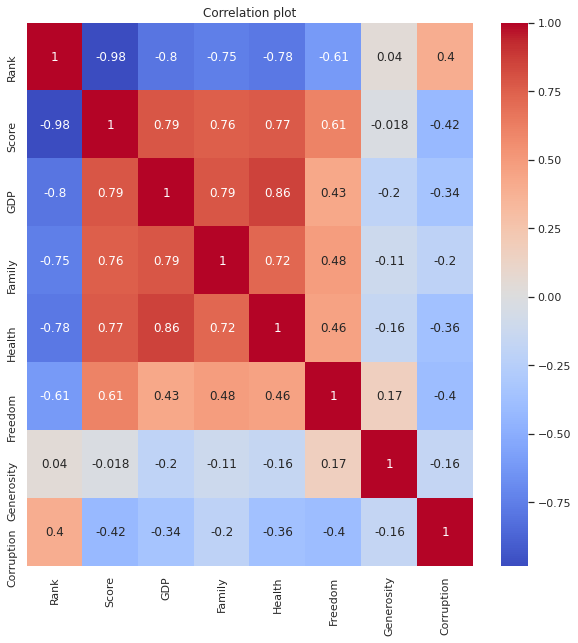

In [31]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(hwc20, annot=True, cmap='coolwarm')
plt.title('Correlation plot')


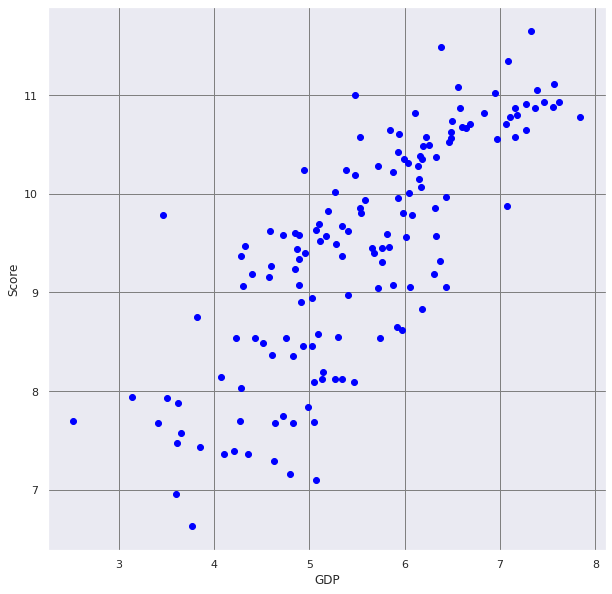

In [32]:
plt.scatter(hw20.Score,hw20.GDP,color='blue')
plt.xlabel('GDP')
plt.ylabel('Score')
plt.grid(color='gray', linestyle='-' ,linewidth=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ee02402d0>,
      dtype=object)

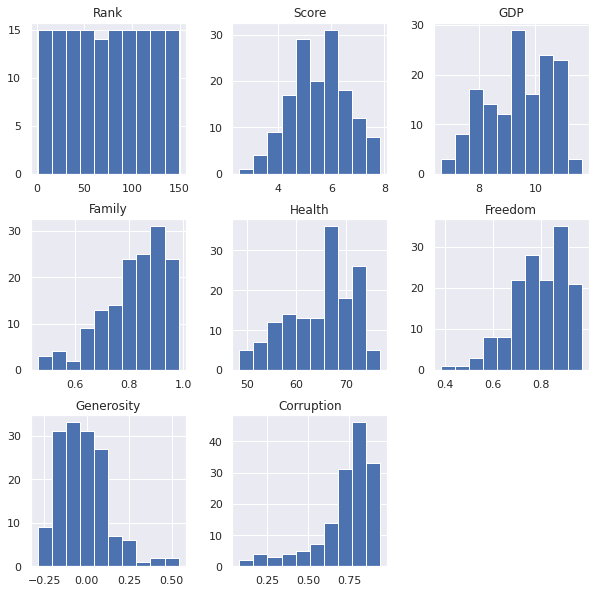

In [33]:
hw20.hist()

1. ALGORITAM LINEARNE REGRESIJE

In [34]:
from sklearn.linear_model import LinearRegression
import scipy as sp
from sklearn import metrics
%matplotlib inline

In [35]:
hw20.columns

Index(['Rank', 'Country', 'Score', 'GDP', 'Family', 'Health', 'Freedom',
       'Generosity', 'Corruption', 'Year'],
      dtype='object')

In [36]:
reg = LinearRegression()

In [37]:
main_feats = ['GDP', 'Family', 'Health']

In [38]:
x = hw20[main_feats]
y = hw20['Score']

In [39]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
reg.score(x,y)

0.6928323800123863

In [41]:
reg.coef_

array([0.27334509, 3.00051339, 0.04486298])

In [42]:
cdf = pd.DataFrame(reg.coef_,x.columns,columns=['Coeff'])
cdf

,Coeff
GDP,0.273345
Family,3.000513
Health,0.044863


In [45]:
x

,GDP,Family,Health
0,10.775,0.954,72.000
1,10.933,0.954,72.700
2,11.117,0.942,74.400
3,10.878,0.983,73.000
4,10.932,0.942,72.400
...,...,...,...
144,7.926,0.787,48.700
145,9.782,0.784,59.269
146,7.676,0.552,61.400
147,7.943,0.750,56.201


In [46]:
df1 = hw20[['Score']]


In [47]:
predictions = reg.predict(x)
df1['Predictions'] =predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
df1.head()

,Score,Predictions
0,7.842,6.632085
1,7.620,6.706678
2,7.571,6.797234
3,7.554,6.792117
4,7.464,6.656939


In [49]:
df1['Error']=(df1['Score']-df1['Predictions'])**2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df1.head()

,Score,Predictions,Error
0,7.842,6.632085,1.463894
1,7.620,6.706678,0.834158
2,7.571,6.797234,0.598714
3,7.554,6.792117,0.580465
4,7.464,6.656939,0.651347


In [51]:
df1.mean()

Score          5.532839
Predictions    5.532839
Error          0.351882
dtype: float64

In [52]:
hw20.columns

Index(['Rank', 'Country', 'Score', 'GDP', 'Family', 'Health', 'Freedom',
       'Generosity', 'Corruption', 'Year'],
      dtype='object')

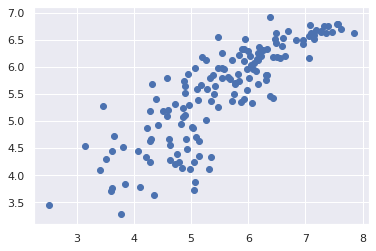

In [53]:
plt.scatter(y,predictions, linewidths=1)

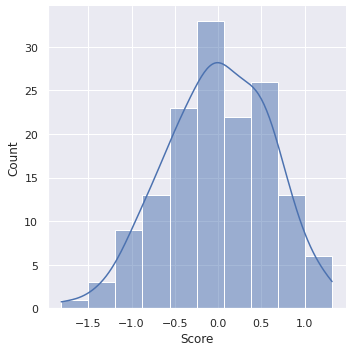

In [54]:
sns.displot(y-predictions, kde=True)

In [55]:
metrics.mean_absolute_error(y,predictions)

0.4786013084223609

In [56]:
metrics.mean_squared_error(y,predictions)

0.3518824642420089

In [57]:
np.sqrt(metrics.mean_squared_error(y,predictions))

0.5931968174577549

2. ALGORITMI REGRESORI:
 - RANDOM FOREST - REGRESOR
 - DECISION TREE REGRESOR
 - ADABOOST

In [58]:
from sklearn.tree import DecisionTreeRegressor #DecisionTree Regressor
from sklearn.ensemble import RandomForestRegressor # RandomForest Regressor
from sklearn.ensemble import AdaBoostRegressor #AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

hw20_x = hw20[['GDP', 'Family', 'Health', 'Freedom', 'Corruption']]
hw20_y = hw20[['Score']] 


(train_x, test_x, train_y, test_y) = train_test_split(hw20_x, hw20_y, test_size=0.25) # obucavanje

# Create model
# Regression models
RandomForest_model = RandomForestRegressor(n_estimators=100,random_state=42)
DecisionTree_model = DecisionTreeRegressor(max_depth=4)
AdaBoost_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400,random_state=7)

# Learning model (just compare DecisionTree vs RandomForest and AdaBoost)
DecisionTree_model.fit(train_x, train_y)
RandomForest_model.fit(train_x, train_y)
AdaBoost_model.fit(train_x, train_y)

DecisionTree_pred_y = DecisionTree_model.predict(test_x)
RandomForest_pred_y = RandomForest_model.predict(test_x)
AdaBoost_pred_y = AdaBoost_model.predict(test_x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
from sklearn import metrics

#LOSS FUNCIONS RF
print('RF Mean Absolute Error:', metrics.mean_absolute_error(test_y,RandomForest_pred_y))
print('RF Mean Squared Error:', metrics.mean_squared_error(test_y,RandomForest_pred_y))
print('RF Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y,RandomForest_pred_y)))

RF Mean Absolute Error: 0.45009710526315877
RF Mean Squared Error: 0.34334764053421146
RF Root Mean Squared Error: 0.5859587362043606


In [60]:
#LOSS FUNCTIONS DT
print('DT Mean Absolute Error:', metrics.mean_absolute_error(test_y,DecisionTree_pred_y))
print('DT Mean Squared Error:', metrics.mean_squared_error(test_y,DecisionTree_pred_y))
print('DT Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y,DecisionTree_pred_y)))

DT Mean Absolute Error: 0.5336913581301742
DT Mean Squared Error: 0.40361735384627956
DT Root Mean Squared Error: 0.6353088649202682


In [61]:
#LOSS FUNCTIONS AB
print('AB Mean Absolute Error:', metrics.mean_absolute_error(test_y,AdaBoost_pred_y))
print('AB Mean Squared Error:', metrics.mean_squared_error(test_y,AdaBoost_pred_y))
print('AB Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y,AdaBoost_pred_y)))

AB Mean Absolute Error: 0.4453877335027534
AB Mean Squared Error: 0.3205027668352759
AB Root Mean Squared Error: 0.5661296378350774


EVALUATION METRICS FOR REGRESSION PROBLEM

MAE - samo prosecna greska /srednja vrednost apsolutne vrednosti greske
MSE - na kvadrat
RMSE - koren MSE
Ovo su LOSS FUNCTIONS, koje je potrebno minimizovati da bi kreirali najbolji moguci model

3. ALGORITMI KLASIFIKATORI

 - RANDOM FOREST
 - SUPPORT VECTOR MACHINE (SVM)

Random Forest i Support Vector Machine algoritmi KLASIFIKATORI

Da bi primenili klasifikatore Random Forest i Support Vector Machine, napravili smo jos jednu kolonu na osnovu Score, koja daje informaciju da li je neka yemlja srecna ili ne.

In [62]:
happy = []
for i in hw20.Score:
   if (i > 5):
     happy.append('Yes')

   else:
     happy.append('No')

hw20['Happy']=happy

In [63]:
hw20.head()

,Rank,Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Year,Happy
0,1,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2020,Yes
1,2,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2020,Yes
2,3,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2020,Yes
3,4,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2020,Yes
4,5,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2020,Yes


In [64]:
hw20['Happy'].value_counts()

Yes    101
No      48
Name: Happy, dtype: int64

In [65]:
hw20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        149 non-null    int64  
 1   Country     149 non-null    object 
 2   Score       149 non-null    float64
 3   GDP         149 non-null    float64
 4   Family      149 non-null    float64
 5   Health      149 non-null    float64
 6   Freedom     149 non-null    float64
 7   Generosity  149 non-null    float64
 8   Corruption  149 non-null    float64
 9   Year        149 non-null    object 
 10  Happy       149 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 12.9+ KB


In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [67]:
for column in hw20.columns:
   if hw20[column].dtypes==np.number:
       continue
   hw20[column]= LabelEncoder().fit_transform(hw20[column])

hw20.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


,Rank,Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Year,Happy
0,0,40,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,0,1
1,1,33,7.620,10.933,0.954,72.7,0.946,0.030,0.179,0,1
2,2,128,7.571,11.117,0.942,74.4,0.919,0.025,0.292,0,1
3,3,54,7.554,10.878,0.983,73.0,0.955,0.160,0.673,0,1
4,4,96,7.464,10.932,0.942,72.4,0.913,0.175,0.338,0,1


In [68]:
hw20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        149 non-null    int64  
 1   Country     149 non-null    int64  
 2   Score       149 non-null    float64
 3   GDP         149 non-null    float64
 4   Family      149 non-null    float64
 5   Health      149 non-null    float64
 6   Freedom     149 non-null    float64
 7   Generosity  149 non-null    float64
 8   Corruption  149 non-null    float64
 9   Year        149 non-null    int64  
 10  Happy       149 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 12.9 KB


In [69]:
X = hw20.drop(columns={'Happy','Rank','Year','Score'}, axis=1)
Y = hw20['Happy']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state = 0)

In [71]:
#preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
#evaluacija
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rforest = RandomForestClassifier()

rforest.fit(X_train, Y_train)

y_pred = rforest.predict(X_test)
acc_rforest = accuracy_score(Y_test, y_pred)

print("Accuracy: {}".format(acc_rforest))
print()
print(classification_report(Y_test,y_pred))
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
print(cnf_matrix)





Accuracy: 0.8421052631578947

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.96      0.82      0.88        28

    accuracy                           0.84        38
   macro avg       0.80      0.86      0.82        38
weighted avg       0.88      0.84      0.85        38

[[ 9  1]
 [ 5 23]]


In [74]:
from sklearn.svm import SVC

In [75]:
#Support Vector Machine
from sklearn.svm import SVC
svc_cl = SVC()
svc_cl.fit(X_train, Y_train)
y_pred_svc = svc_cl.predict(X_test)
acc_svm = accuracy_score(Y_test, y_pred_svc)
print("Accuracy: {}".format(acc_svm))
print()
print(classification_report(Y_test,y_pred_svc))
cnf_matrix_svc = metrics.confusion_matrix(Y_test,y_pred_svc)
print(cnf_matrix_svc)

Accuracy: 0.8421052631578947

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.96      0.82      0.88        28

    accuracy                           0.84        38
   macro avg       0.80      0.86      0.82        38
weighted avg       0.88      0.84      0.85        38

[[ 9  1]
 [ 5 23]]


EVALUATION METRICS FOR CLASSIFICATION PROBLEM Merenje rezultata za klasifikacioni problem je classification report.: koliko je predikcija tacno, a koliko ne. Tacnije: true positive (TP), true negative(TN), false positive (FP) i false negative (FN) (confusion matrix).

Accuracy - jedna od metrika za evaluaciju klasifikacionog modela. Predstavlja procenat tacnosti modela. Odnosno: broj tacnih predikcija/ukupan broj predikcija.
Precision - tacnost pozitivnih predikcija. TP/(TP+FP)
Recall - suprotno od precision, deo pozitivnih instanci koje su uspesno identifikovane. TP/(TP+FN)
F1-score - ponderisana harmonijska sredina precision i recall, gde je nabolji rezultat 1, a najgori 0. Formula: F1 Score = 2(RecallPrecision)/(Recall+Precision)

ZAKLJUCAK
Na osnovu Galupovog izvestaja za 2020tu godinu, mozemo zakljuciti da, bez obzira na pandemiju COVID19 koja je zadesila svet prosle godine, uticaj faktora koji uticu na srecu jedne zemlje nije promenjen.